In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# Video ref https://www.youtube.com/watch?v=J1jhfAw5Uvo&list=WL&index=10

2023-08-14 17:51:52.236265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 17:51:52.319648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 17:51:52.320779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 17:51:54.901999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# Load the Dataset
X_train = np.loadtxt("input.csv", delimiter = ",")
Y_train = np.loadtxt("labels.csv", delimiter = ",")

X_test = np.loadtxt("input_test.csv", delimiter = ",")
Y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [10]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
Y_train = Y_train/255.0

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_testn:  (400, 1)


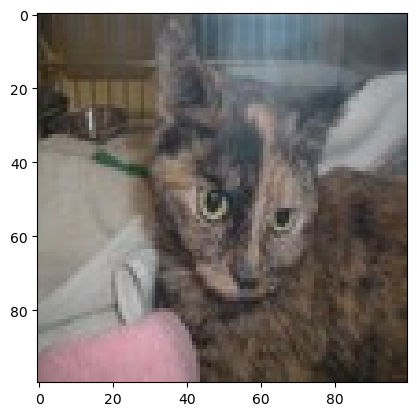

In [38]:
# Show a random Image
# X_train[0]
index = random.randint(0, len(X_train))
plt.imshow(X_train[index, :])
plt.show()

# Model

In [17]:
model = Sequential([
    Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = "relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation ='relu'),
    Dense(1, activation = 'sigmoid')
])

In [18]:
# Other way of defining the Model
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
# opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 11s 333ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 10s 319ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 10s 318ms/step - loss: 0.0140 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 10s 323ms/step - loss: 0.0139 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 10s 317ms/step - loss: 0.0139 - accuracy: 0.5000


In [24]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 55ms/step - loss: 425.0193 - accuracy: 0.5000


[425.0192565917969, 0.5]

# Making the predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


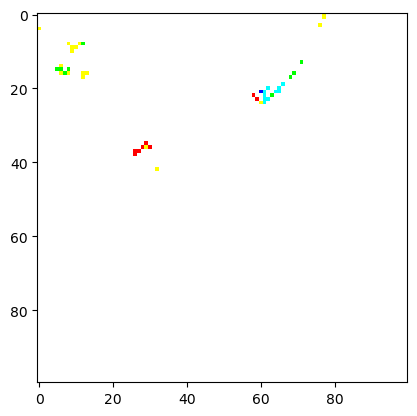

1/1 [==============================] - 0s 20ms/step
[[0.]]
Our Model says it is a : Dog


In [34]:
index2 = random.randint(0, len(Y_test))
plt.imshow(X_test[index2, :])
plt.show()
y_pred = model.predict(X_test[index2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "Dog"
else:
    pred = "Cat"
    
print("Our Model says it is a :", pred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


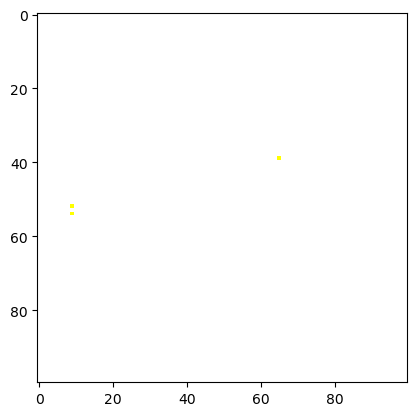

In [36]:
X_test[0]
index = random.randint(0, len(X_test))
plt.imshow(X_test[index, :])
plt.show()